In [1]:
import time      # for testing use only
import os         # for testing use only

import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests 
import re
import csv
from itertools import count
import math
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EDA_data.csv', index_col=0)

In [3]:
df

,Overall Pick,Teams,year,Names,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,...,Points per Game,Total Rebounds per Game,Assists per Game,Win Shares,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,First Position
0,1,DET,2021,Cade Cunningham,Oklahoma State,1.0,29.0,935.0,441.0,170.0,...,15.2,5.9,5.3,-0.5,-0.026,-2.4,-0.1,198.120000,99.790240,Point Guard
1,3,CLE,2021,Evan Mobley,USC,1.0,32.0,1081.0,473.0,259.0,...,14.8,8.1,2.5,3.0,0.132,1.7,1.0,210.127273,97.522280,Power Forward
2,4,TOR,2021,Scottie Barnes,Florida State,1.0,32.0,1137.0,470.0,255.0,...,14.7,8.0,3.5,2.7,0.114,0.6,0.7,207.125455,102.965384,Power Forward
3,5,ORL,2021,Jalen Suggs,Gonzaga,1.0,21.0,583.0,258.0,71.0,...,12.3,3.4,3.6,-1.1,-0.092,-6.0,-0.6,192.116364,92.986360,Point Guard
4,8,ORL,2021,Franz Wagner,Michigan,1.0,41.0,1317.0,643.0,191.0,...,15.7,4.7,2.6,2.0,0.071,-1.0,0.3,207.125455,102.058200,Small Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2,SDR,1970,Rudy Tomjanovich,Michigan,11.0,768.0,25714.0,13383.0,6198.0,...,17.4,8.1,2.0,70.4,0.131,0.8,13.3,204.123636,98.883056,Power Forward
2027,103,SDR,1970,Billy Paultz,St. John's,9.0,637.0,13630.0,5432.0,3553.0,...,8.5,5.6,1.6,26.3,0.093,-0.2,6.3,183.411091,106.594120,Center
2028,122,DET,1970,Dan Issel,Kentucky,9.0,718.0,22342.0,14659.0,5707.0,...,20.4,7.9,2.5,82.3,0.177,2.3,24.3,207.125455,106.594120,Center
2029,155,SFW,1970,Coby Dietrick,San Jose State,7.0,480.0,9241.0,2915.0,1869.0,...,6.1,3.9,2.1,15.5,0.080,0.1,4.9,183.110909,99.790240,Center


## Assists + Position

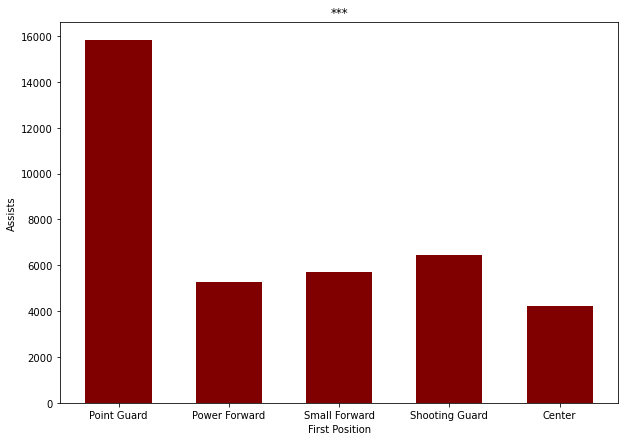

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Assists'], color ='maroon',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Assists")
plt.title("***")
plt.show()

## Rebounds + Position

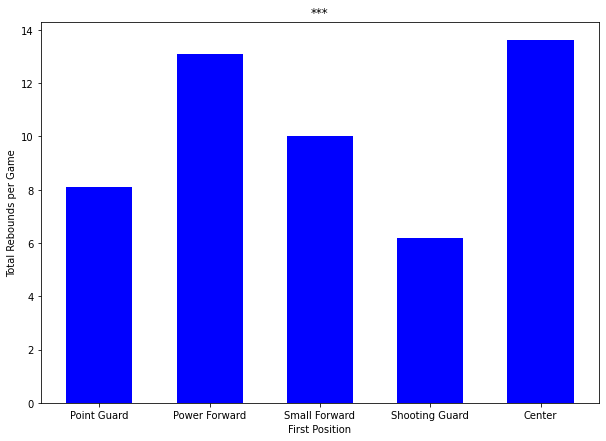

In [13]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Total Rebounds per Game'], color = 'blue',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Total Rebounds per Game")
plt.title("***")
plt.show()

## Points  + Position

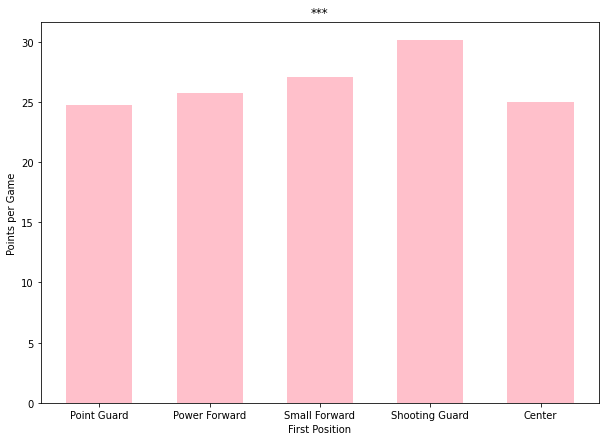

In [14]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Points per Game'], color = 'pink',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Points per Game")
plt.title("***")
plt.show()

## Position + Height

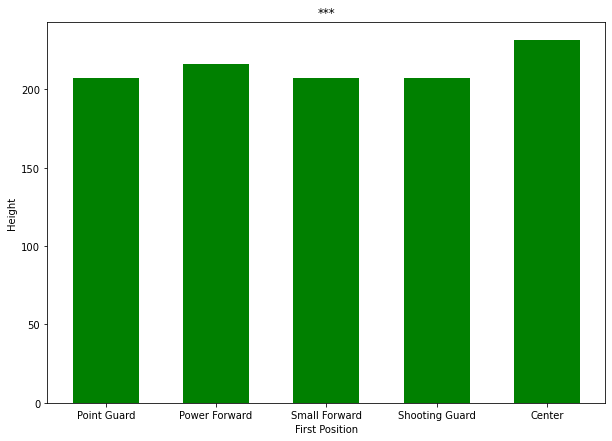

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['First Position'], df['Height'], color = 'green',
        width = 0.6)
 
plt.xlabel("First Position")
plt.ylabel("Height")
plt.title("***")
plt.show()

## The connection between Height and player position

(0.0, 600.0)

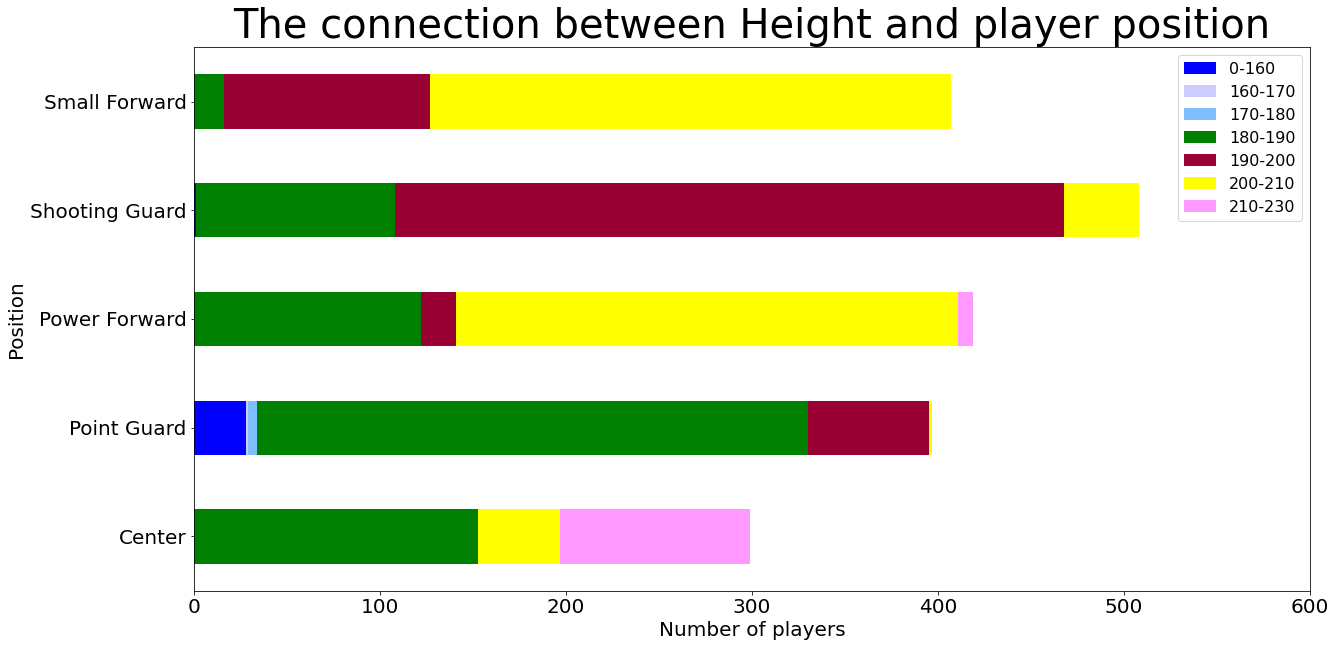

In [16]:
players_count=df.groupby("First Position").count()["Names"]
players = df[df["First Position"].isin(list(players_count.keys()))]

test = pd.cut(x=df['Height'], bins=[0,160,170,180,190,200,210,230], labels=["0-160","160-170","170-180","180-190","190-200","200-210","210-230"])
players['Height_group'] = test

players.groupby(["First Position", "Height_group"]).count()['Teams'].dropna()\
    .unstack("Height_group").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "The connection between Height and player position",color=['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','#80ffbf','black',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('Number of players',fontsize=20)
plt.ylabel('Position',fontsize=20) 
plt.legend(fontsize=16)
plt.xlim(0,600)

(0.0, 600.0)

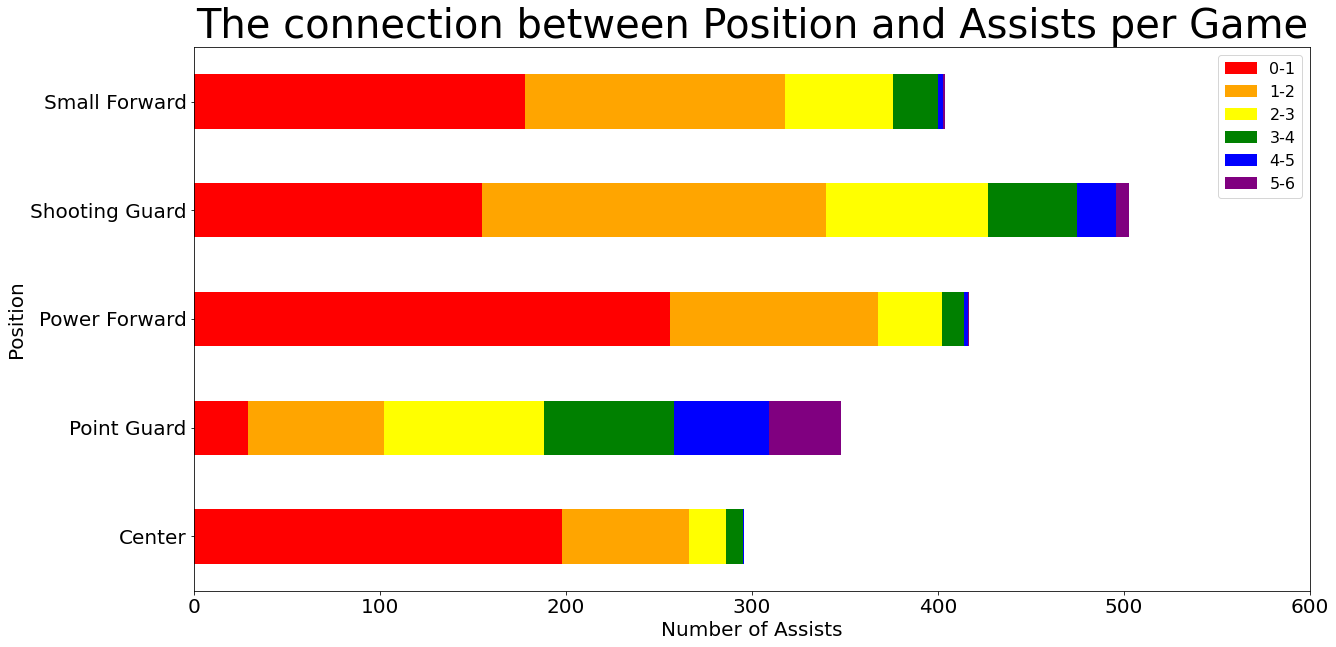

In [17]:
players_count=df.groupby("First Position").count()["Names"]
players = df[df["First Position"].isin(list(players_count.keys()))]

test = pd.cut(x=df['Assists per Game'], bins=[0,1,2,3,4,5,6], labels=["0-1","1-2","2-3","3-4","4-5","5-6"])
players['Assists per Game_group'] = test

players.groupby(["First Position", "Assists per Game_group"]).count()['Teams'].dropna()\
    .unstack("Assists per Game_group").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "The connection between Position and Assists per Game",color=['red','orange','yellow','green','blue','purple']).title.set_size(40)
plt.xlabel('Number of Assists',fontsize=20)
plt.ylabel('Position',fontsize=20) 
plt.legend(fontsize=16)
plt.xlim(0,600)